In [9]:
import pandas as pd
print(pd.__version__)

2.3.3


In [10]:
data = pd.read_csv('data/인구현황.csv')
print(data.shape)
print(type(data))

(18, 8)
<class 'pandas.core.frame.DataFrame'>


In [11]:
# head() 함수
data.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [12]:
# tail() 함수
data.tail()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
13,5200000000,전북특별자치도,1738690,864608,2.01,866030,872660,0.99
14,4600000000,전라남도,1788819,912412,1.96,902380,886439,1.02
15,4700000000,경상북도,2531384,1291568,1.96,1280547,1250837,1.02
16,4800000000,경상남도,3228380,1537492,2.10,1626926,1601454,1.02
17,5000000000,제주특별자치도,670368,314862,2.13,335255,335113,1.00


In [13]:
# info() 함수
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정기관코드  18 non-null     int64  
 1   행정기관    18 non-null     object 
 2   총인구수    18 non-null     int64  
 3   세대수     18 non-null     int64  
 4   세대당 인구  18 non-null     float64
 5   남자 인구수  18 non-null     int64  
 6   여자 인구수  18 non-null     int64  
 7   남여 비율   18 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ KB


In [14]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
data.describe()

,행정기관코드,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
count,1.800000e+01,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000
mean,3.611111e+09,5.690802e+06,2.679881e+06,2.106111,2.833147e+06,2.857655e+06,1.000000
std,1.291551e+09,1.182867e+07,5.551980e+06,0.111626,5.887446e+06,5.941506e+06,0.033781
min,1.000000e+09,3.906850e+05,1.634320e+05,1.960000,1.944130e+05,1.962720e+05,0.930000
25%,2.825000e+09,1.458809e+06,7.070262e+05,2.022500,7.287245e+05,7.300848e+05,0.990000
50%,3.850000e+09,1.962696e+06,9.822705e+05,2.095000,9.992540e+05,9.634425e+05,1.000000
75%,4.675000e+09,3.176538e+06,1.496576e+06,2.140000,1.569745e+06,1.579032e+06,1.020000
max,5.200000e+09,5.121722e+07,2.411893e+07,2.390000,2.549832e+07,2.571890e+07,1.060000


In [15]:
#numpy np.number 속성을 사용해서 describe()
import numpy as np
data.describe(include=np.number)

,행정기관코드,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
count,1.800000e+01,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000
mean,3.611111e+09,5.690802e+06,2.679881e+06,2.106111,2.833147e+06,2.857655e+06,1.000000
std,1.291551e+09,1.182867e+07,5.551980e+06,0.111626,5.887446e+06,5.941506e+06,0.033781
min,1.000000e+09,3.906850e+05,1.634320e+05,1.960000,1.944130e+05,1.962720e+05,0.930000
25%,2.825000e+09,1.458809e+06,7.070262e+05,2.022500,7.287245e+05,7.300848e+05,0.990000
50%,3.850000e+09,1.962696e+06,9.822705e+05,2.095000,9.992540e+05,9.634425e+05,1.000000
75%,4.675000e+09,3.176538e+06,1.496576e+06,2.140000,1.569745e+06,1.579032e+06,1.020000
max,5.200000e+09,5.121722e+07,2.411893e+07,2.390000,2.549832e+07,2.571890e+07,1.060000


# 1. 지역별 총인구수 Top5

In [40]:
# '전국'이 포함된 합계 행 제외
data_region_only = data[data['행정기관'].str.contains('전국') == False].copy()
# 정렬을 통해 상위 5개를 먼저 추출 (가장 인구가 많은 순서대로)
top5_data = data_region_only.sort_values(by='총인구수', ascending=False).head(5)
result1 = top5_data.loc[:, ['행정기관', '총인구수']].reset_index(drop=True)
result1.index = result1.index + 1  # 0~4인 인덱스를 1~5로 변환


print(result1)

    행정기관      총인구수
1    경기도  13694685
2  서울특별시   9331828
3  부산광역시   3266598
4   경상남도   3228380
5  인천광역시   3021010


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# 1. 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 2. 마이너스 기호(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1-1. 지역별 총인구수 plot

Figure(1800x1200)
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, '지역별 총인구수')

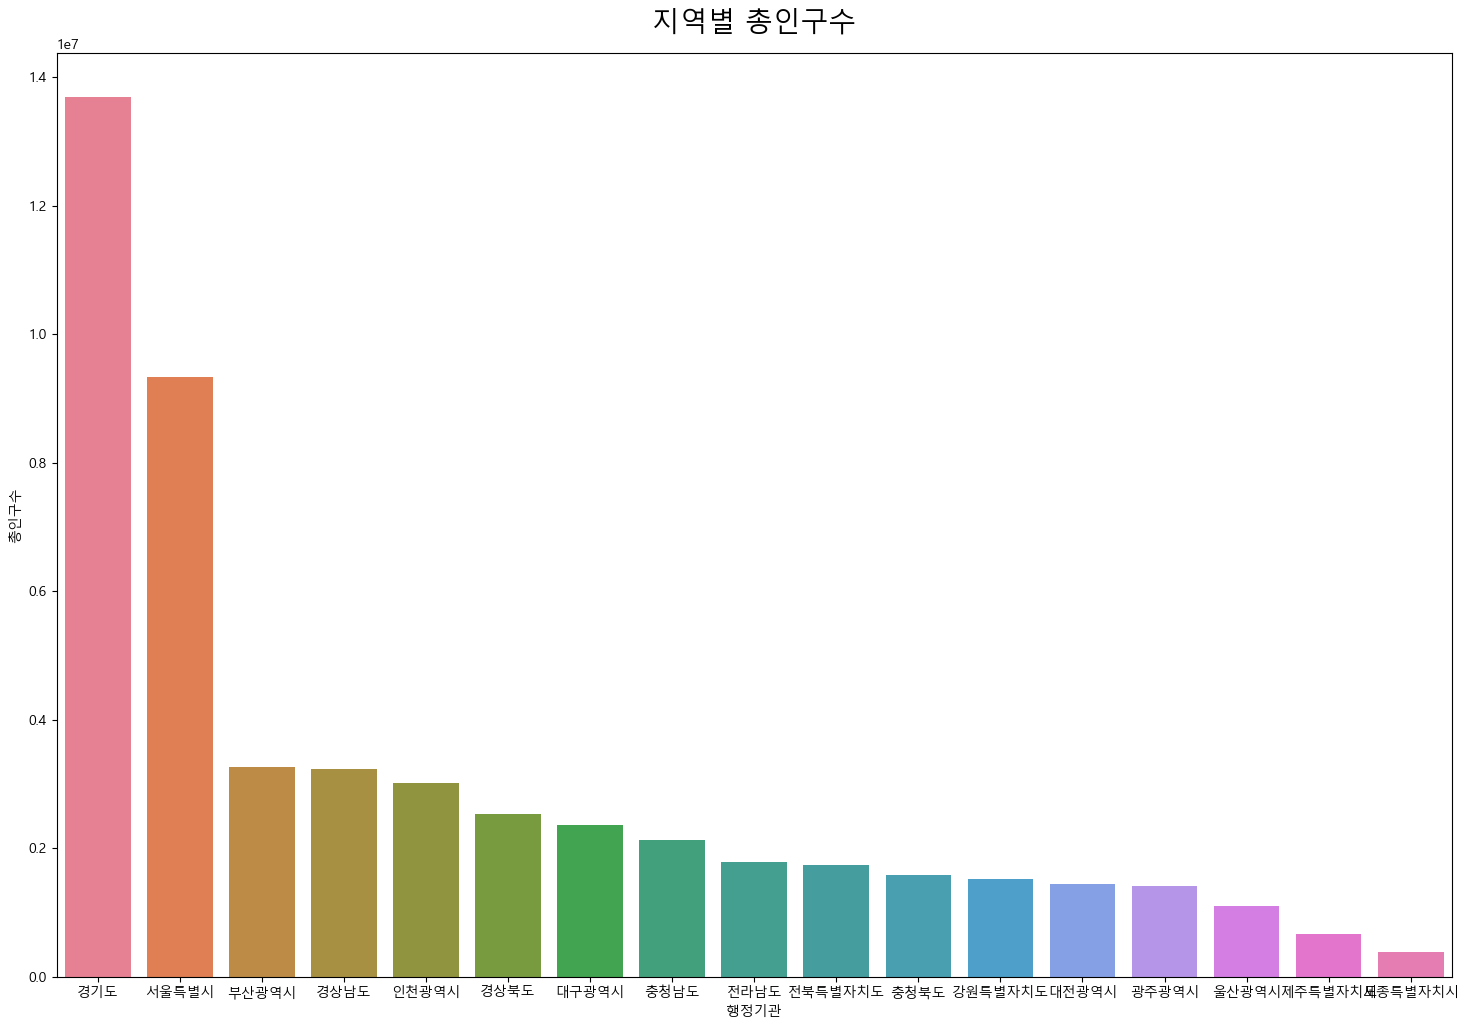

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# subplots() 함수를 사용하여 axes 객체를 생성하기
figure, (axes1)= plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=data_region_only.sort_values(by='총인구수', ascending=False), x='행정기관', y='총인구수', ax=axes1, hue='행정기관')
axes1.set_title('지역별 총인구수', fontsize=20, pad=15)
#plt.show()

# 2. 세대당 인구수 높은 지역 Top5

In [ ]:


# '전국'이 포함된 합계 행 제외
data_region = data[data['행정기관'].str.contains('전국') == False].copy()
# 정렬을 통해 상위 5개를 먼저 추출
top5_data = data_region.sort_values(by='세대당 인구', ascending=False).head(5)
result2 = top5_data.loc[:, ['행정기관', '세대당 인구']].reset_index(drop=True)
result2.index = result2.index + 1  # 0~4인 인덱스를 1~5로 변환


print(result2)

      행정기관  세대당 인구
1  세종특별자치시    2.39
2      경기도    2.26
3    울산광역시    2.22
4    인천광역시    2.20
5    대구광역시    2.14


# 2-1. 지역별 세대당 인구 Plot

Figure(1800x1200)
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, '지역별 세대당 인구')

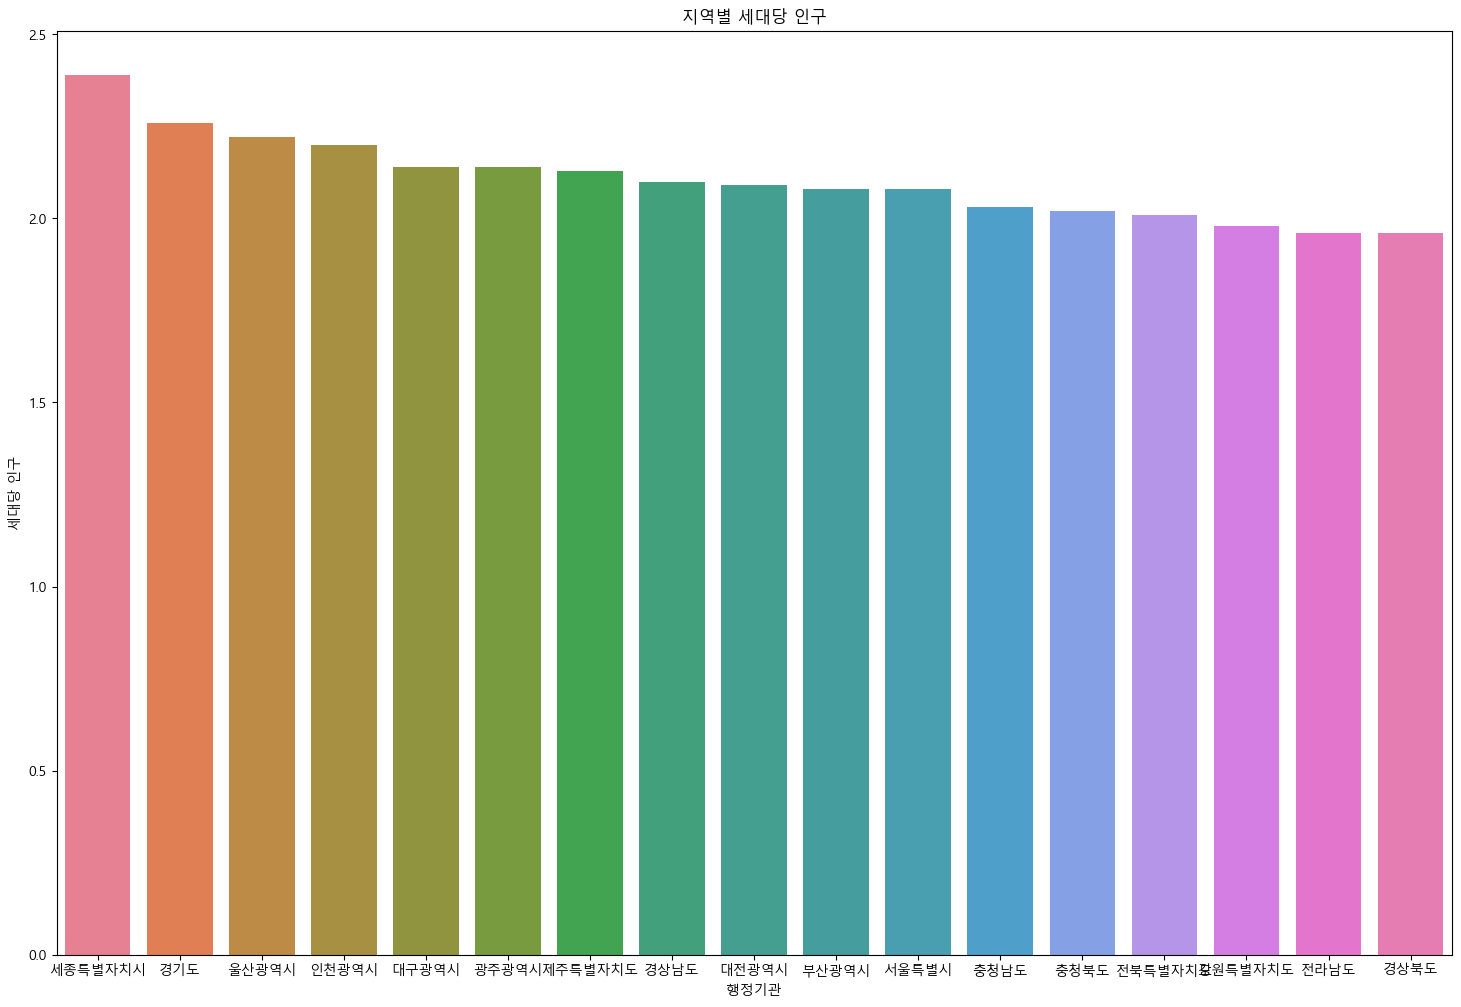

In [65]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# subplots() 함수를 사용하여 axes 객체를 생성하기
figure, (axes2)= plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes2)
# seaborn의 barplot() 함수 호출하기 
sns.barplot(data=data_region.sort_values(by='세대당 인구', ascending=False), x='행정기관', y='세대당 인구', ax=axes2, hue='행정기관')
axes2.set_title('지역별 세대당 인구')
#plt.show()

# 3. 남녀 비율 분석

In [66]:
# '전국'이 포함된 합계 행 제외
data_region_mw = data[data['행정기관'].str.contains('전국') == False].copy()
# 정렬
data = data_region_mw.sort_values(by='남여 비율', ascending=False)
result3 = data.loc[:, ['행정기관', '남여 비율']].reset_index(drop=True)
result3.index = result3.index + 1  # 0~4인 인덱스를 1~5로 변환


print(result3)

       행정기관  남여 비율
1     울산광역시   1.06
2      충청남도   1.05
3      충청북도   1.04
4      경상남도   1.02
5      경상북도   1.02
6      전라남도   1.02
7       경기도   1.01
8   강원특별자치도   1.01
9   제주특별자치도   1.00
10    인천광역시   1.00
11  세종특별자치시   0.99
12    대전광역시   0.99
13  전북특별자치도   0.99
14    광주광역시   0.97
15    대구광역시   0.96
16    부산광역시   0.95
17    서울특별시   0.93


# 3-1. 남녀 비율 분석 Plot

Figure(1800x1200)
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, '지역별 남여 비율')

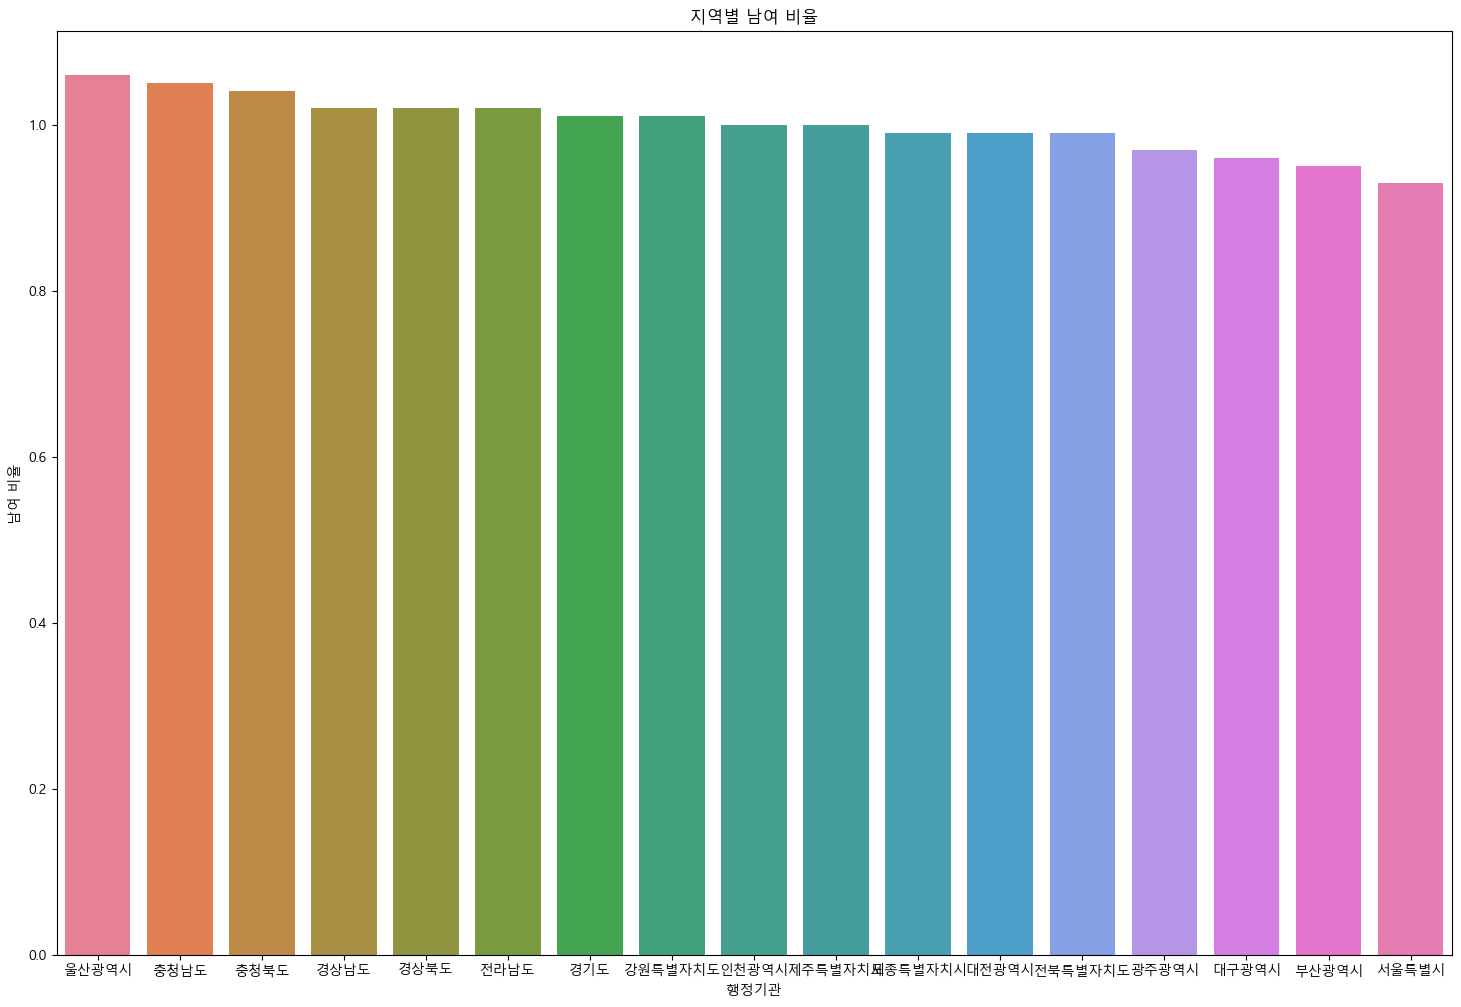

In [ ]:
 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# subplots() 함수를 사용하여 axes 객체를 생성하기
figure, (axes2)= plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes2)
# seaborn의 barplot() 함수 호출하기 
sns.barplot(data=data_region_mw.sort_values(by='남여 비율', ascending=False), x='행정기관', y='남여 비율', ax=axes2, hue='행정기관')
axes2.set_title('지역별 남여 비율')
#plt.show()

4. 남자초과 / 여자초과 분석

In [68]:
# 1. '전국' 제외 및 남초여초 판별
data_region_mw = data[data['행정기관'].str.contains('전국') == False].copy()
data_region_mw['남초여초'] = '동일'
data_region_mw.loc[data_region_mw['남여 비율'] > 1, '남초여초'] = '남초'
data_region_mw.loc[data_region_mw['남여 비율'] < 1, '남초여초'] = '여초'

# 2. 표 형식 맞추기 (행정기관, 남여 비율, 남초여초)
result4 = data_region_mw[['행정기관', '남여 비율', '남초여초']].reset_index(drop=True)
result4.index = result4.index + 1

# 3. 결과 출력
print("4. 남자초과 / 여자초과 분석")
display(result4.head(11))

4. 남자초과 / 여자초과 분석


,행정기관,남여 비율,남초여초
1,울산광역시,1.06,남초
2,충청남도,1.05,남초
3,충청북도,1.04,남초
4,경상남도,1.02,남초
5,경상북도,1.02,남초
6,전라남도,1.02,남초
7,경기도,1.01,남초
8,강원특별자치도,1.01,남초
9,제주특별자치도,1.00,동일
10,인천광역시,1.00,동일


# 5. 세대당 인구 평균보다 높은 지역

In [ ]:


# 1. '전국' 행이 있는지 확인하고 평균값 가져오기
national_row = data[data['행정기관'].str.contains('전국', na=False)]

if not national_row.empty:
    # '전국' 데이터가 있는 경우 그 값을 사용
    avg_generation = national_row['세대당 인구'].values[0]
else:
    # 만약 이미 '전국'을 지웠다면, 현재 데이터의 전체 평균을 계산
    avg_generation = data['세대당 인구'].mean()

print(f"5. 세대당 인구 평균보다 높은 지역")
print(f"기준 평균 세대당 인구수: {avg_generation:.2f}\n")

# 2. '전국'을 제외한 순수 지역 데이터만 필터링
data_regions = data[data['행정기관'].str.contains('전국') == False].copy()

# 3. 평균보다 높은 지역만 추출
result5 = data_regions[data_regions['세대당 인구'] > avg_generation]

# 4. 내림차순 정렬 및 인덱스 정리
result5 = result5.sort_values(by='세대당 인구', ascending=False)
result5 = result5[['행정기관', '세대당 인구']].reset_index(drop=True)

display(result5)

5. 세대당 인구 평균보다 높은 지역
기준 평균 세대당 인구수: 2.11



,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,광주광역시,2.14
5,대구광역시,2.14
6,제주특별자치도,2.13


# 5-1.   
# 남초 vs 여초 개수 Plot  ( seaborn의 countplot )
# 지역별 세대수 Plot ( seaborn의 barplot )

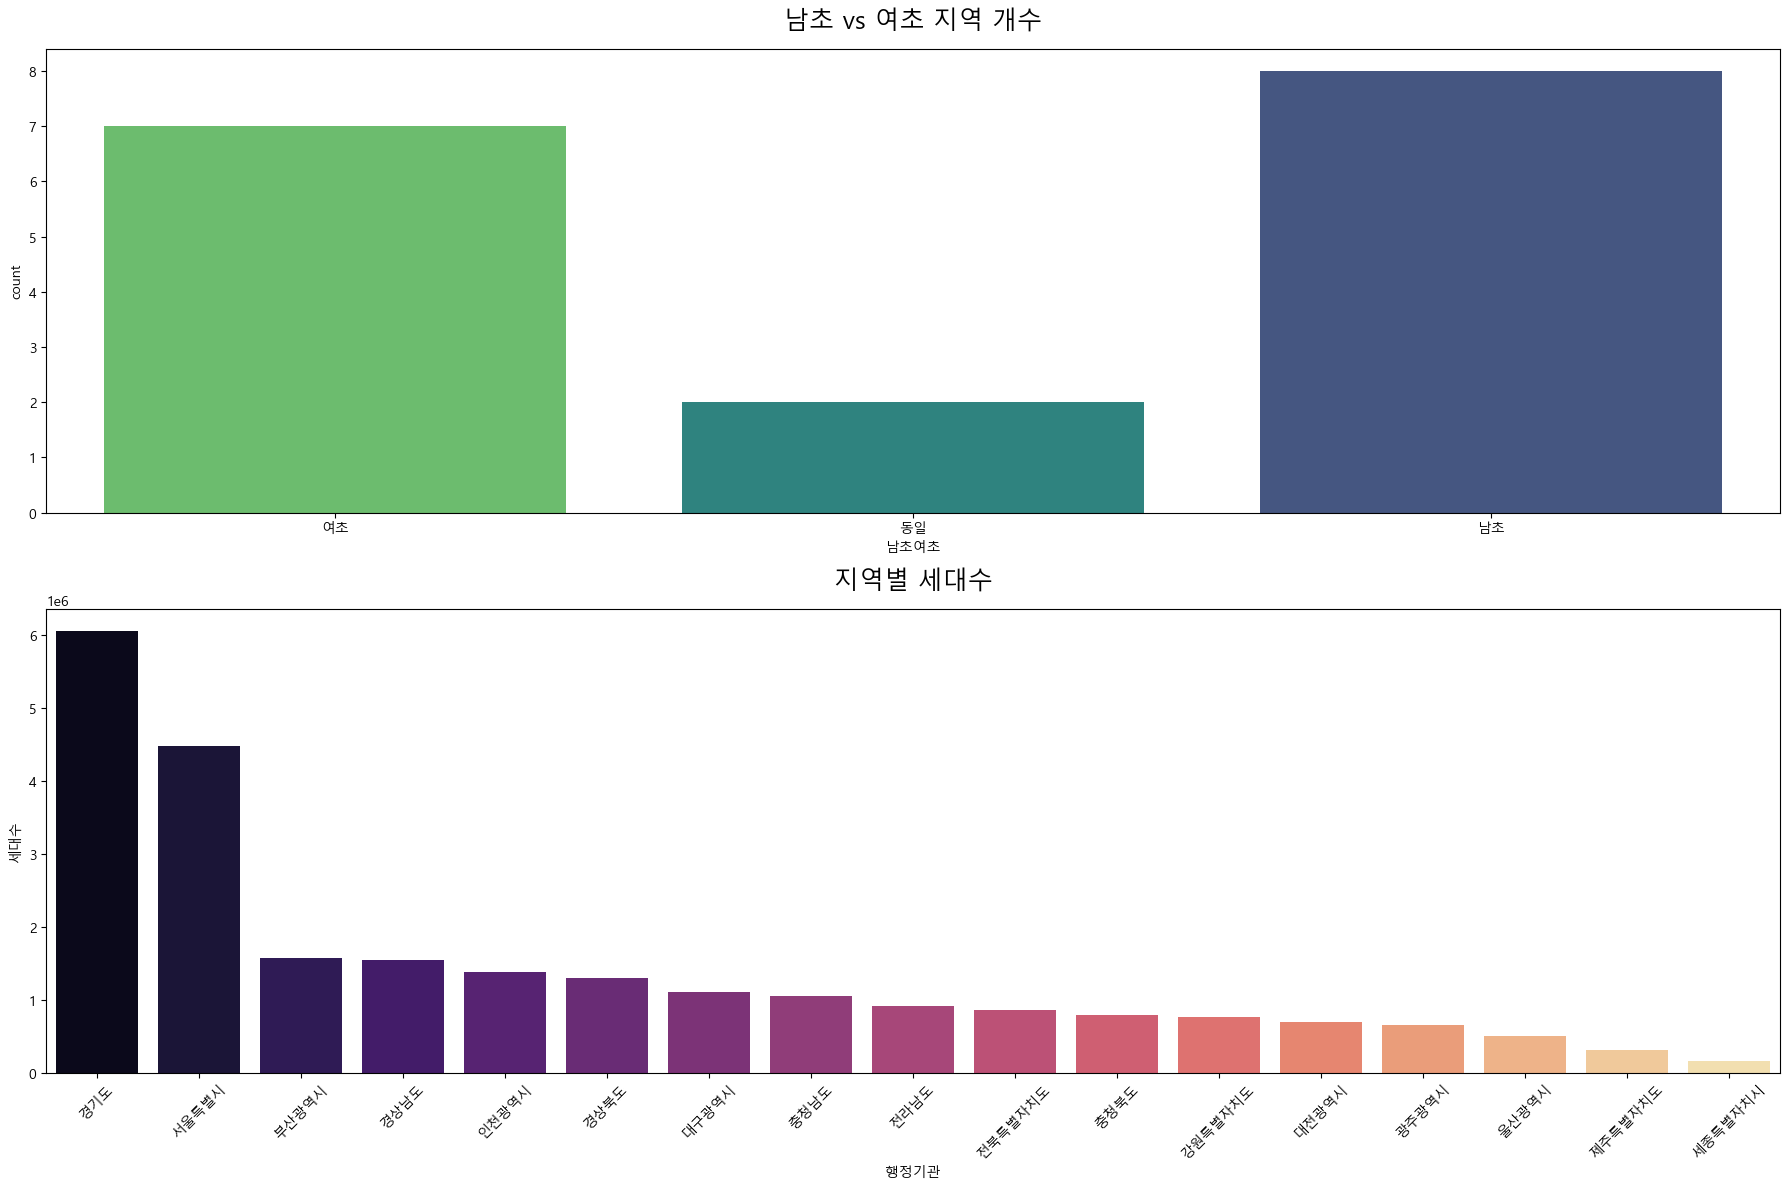

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# 0. 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 계산용 평균값 추출 (화면 출력 X)
national_condition = data['행정기관'].str.contains('전국', na=False)
if national_condition.any():
    avg_generation = data.loc[national_condition, '세대당 인구'].values[0]
else:
    avg_generation = data['세대당 인구'].mean()

# 2. 전국 데이터를 제외한 시각화용 데이터 생성
data_regions = data[data['행정기관'].str.contains('전국') == False].copy()

# 3. 남초여초 판별 (첫 번째 그래프용 데이터 준비)
data_regions['남초여초'] = '동일'
data_regions.loc[data_regions['남여 비율'] > 1, '남초여초'] = '남초'
data_regions.loc[data_regions['남여 비율'] < 1, '남초여초'] = '여초'

# 4. 시각화 (5-1. Plot 출력)
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 12)

# 위: 남초 vs 여초 지역 개수 (countplot)
sns.countplot(data=data_regions, x='남초여초', ax=axes1, 
              order=['여초', '동일', '남초'], hue='남초여초', palette='viridis', legend=False)
axes1.set_title('남초 vs 여초 지역 개수', fontsize=18, pad=15)

# 아래: 지역별 세대수 (barplot, 세대수 내림차순 정렬)
sns.barplot(data=data_regions.sort_values(by='세대수', ascending=False), 
            x='행정기관', y='세대수', ax=axes2, hue='행정기관', palette='magma', legend=False)
axes2.set_title('지역별 세대수', fontsize=18, pad=15)
plt.xticks(rotation=45) # 지역명이 잘 보이도록 회전 추가

plt.tight_layout()
plt.show()